In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("IRIS.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (129, 5)

First 5 Rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
# Check number of classes 
pd.unique(df["species"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Preprocessing
# Encode the target variable
from sklearn.preprocessing import StandardScaler, LabelEncoder

if df["species"].dtype == 'object':
    le = LabelEncoder()
    df["species"] = le.fit_transform(df["species"])

pd.unique(df["species"])

array([0, 1, 2])

In [5]:
# Check for dataset imbalance
print("Number of samples in each class:", df["species"].value_counts())


Number of samples in each class: species
0    50
1    50
2    29
Name: count, dtype: int64


In [6]:
# Now balance the dataset
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

# compute class weights for each instance
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(df["species"]), y = df["species"])
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(df["species"]), class_weights)}

# compute sample weights for each instance
sample_weights = compute_sample_weight(class_weight = class_weights_dict, y = df["species"])

class_weights_dict

{np.int64(0): np.float64(0.86),
 np.int64(1): np.float64(0.86),
 np.int64(2): np.float64(1.4827586206896552)}

In [7]:
# Split features and target variable
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
 
X = df.drop("species", axis = 1)
y = df["species"]

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X_scaled, y, sample_weights, test_size = 0.3, stratify = y, random_state = 42)

#### Assignment 1 - perform EDA on the dataset

In [ ]:
# ASSIGNMENT BEGIN
# correlation analysis, time series analysis, anomaly detection 
# complete EDA using decriptive statistics and different plot on dataset (take into account scaling)

df.info() # check dataset structure
print(f"\nNull values:\n", df.isnull().sum())
print(f"\nDuplicate values:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  129 non-null    float64
 1   sepal_width   129 non-null    float64
 2   petal_length  129 non-null    float64
 3   petal_width   129 non-null    float64
 4   species       129 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.2 KB

Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Duplicate values: 2


       sepal_length  sepal_width  petal_length  petal_width     species
count    129.000000   129.000000    129.000000   129.000000  129.000000
mean       5.716279     3.057364      3.476744     1.062791    0.837209
std        0.794983     0.453075      1.739231     0.727804    0.768427
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.500000     0.200000    0.000000
50%        5.600000     3.000000      4.000000     1.200000    1.000000
75%        6.300000     3.400000      4.800000     1.600000    1.000000
max        7.700000     4.400000      6.900000     2.500000    2.000000


<Axes: xlabel='species', ylabel='count'>

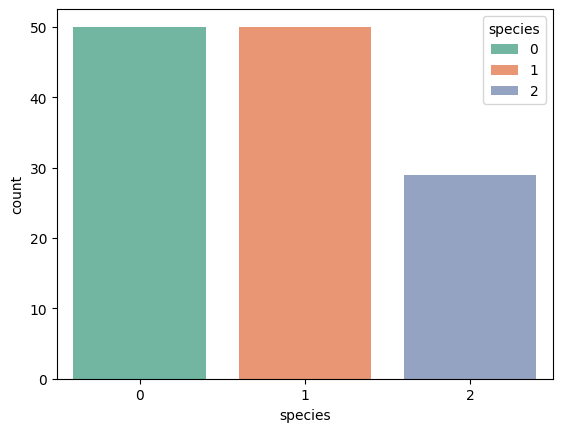

In [28]:
# univariate analysis of each feature
print(df.describe()) # count is 129; ranges, mean, max and min are reasonable  

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "species", data = df, hue = "species", palette = "Set2") # classes appear imbalanced

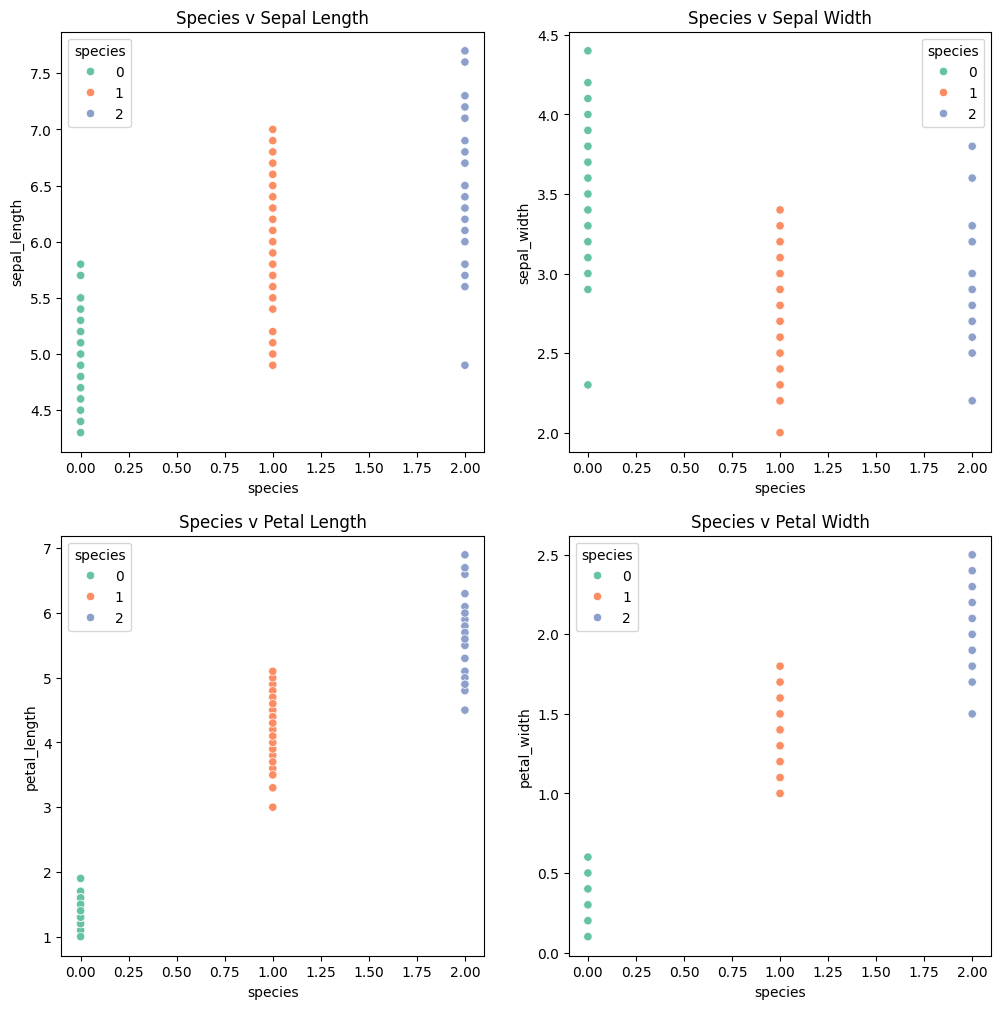

In [36]:
# bivariate analysis - feature v target
fig, axes = plt.subplots(2, 2 , figsize = (12, 12))
sns.scatterplot(x = "species", y = "sepal_length", data = df, hue = "species", palette = "Set2", ax = axes[0,0])
axes[0,0].set_title("Species v Sepal Length")

sns.scatterplot(x = "species", y = "sepal_width", data = df, hue = "species", palette = "Set2", ax = axes[0,1])
axes[0,1].set_title("Species v Sepal Width")

sns.scatterplot(x = "species", y = "petal_length", data = df, hue = "species", palette = "Set2", ax = axes[1,0])
axes[1,0].set_title("Species v Petal Length")

sns.scatterplot(x = "species", y = "petal_width", data = df, hue = "species", palette = "Set2", ax = axes[1,1])
axes[1,1].set_title("Species v Petal Width")

plt.show()

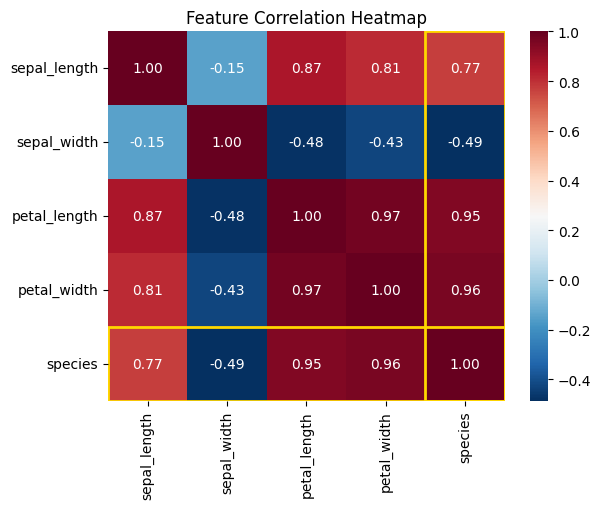

In [ ]:
# multivariate analysis - feature v feature
# scatterplots again or heatmap 
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu_r', fmt = '.2f')


import matplotlib.patches as patches # formatting to highlight target variable

ax = plt.gca()
n = corr.columns.get_loc("species") 
i = corr.index.get_loc("species")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

plt.title('Feature Correlation Heatmap')
plt.show() # it appears that sepal_width does not contribute to the target variable as much as the other features?

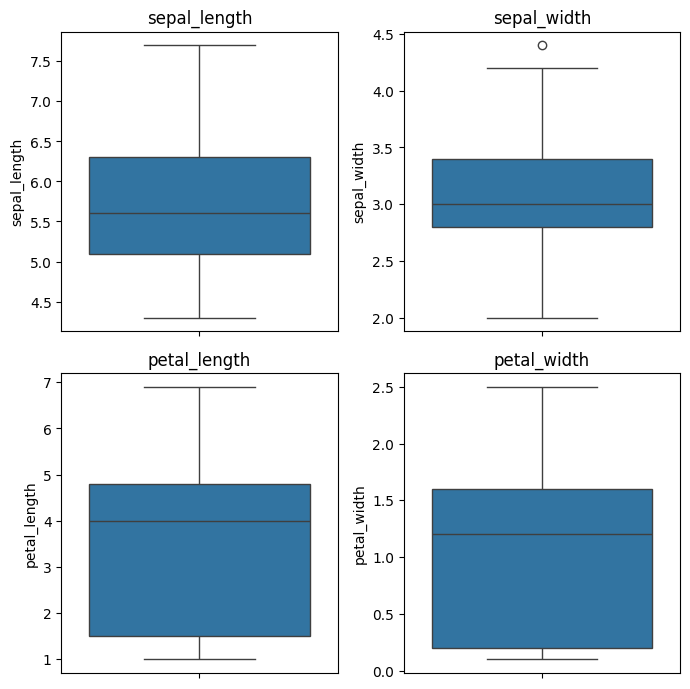

In [ ]:
# data quality checks
# use boxplots or z-scores to identify outliers
# ensure species names are spelled consistently (e.g. “iris-setosa” vs “Iris-setosa”)
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fig, axes = plt.subplots(2, 2 , figsize = (7, 7))
axes = axes.flatten() # make numpy axes into 1D array for looping
for i, col in enumerate(cols):
    sns.boxplot(y = df[col], ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show() # observed an outlier in sepal_width, approx 4.4

In [12]:
#ASSIGNMENT END
# Multiclass Classification without dataset balancing
# LogReg (OVR)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve

lr_ovr = OneVsRestClassifier(LogisticRegression())
lr_ovr.fit(X_train, y_train)
y_pred_lrovr = lr_ovr.predict(X_test)

print("Logistic Regression (OVR) Performance: ")
print(classification_report(y_test, y_pred_lrovr))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lrovr))


Logistic Regression (OVR) Performance: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]


In [15]:
from sklearn import set_config

# Enable metadata routing for OVRClassifier
set_config(enable_metadata_routing = True)

# train model with sample weights using OVR with Logistic Regression
clf = OneVsRestClassifier(LogisticRegression(class_weight = class_weights_dict, max_iter=10000))
clf.estimator.set_fit_request(sample_weight = True)  # Explicitly request sample_weight
clf.fit(X_train, y_train, sample_weight = sw_train)

y_pred = clf.predict(X_test)

# Classification Report and Confusion Matrix
print("\nLogistic Regression (One-vs-Rest) Performance balanced weights:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression (One-vs-Rest) Performance balanced weights:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.60      1.00      0.75         9

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.83        39
weighted avg       0.91      0.85      0.85        39

Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  0  9]]


### DONE:

initialise dataset,
balance dataset,
compute class weights (and sample weights),
scale dataset,
train test on sample weights and scaled data,
did LogReg OVR (imbalanced data)

### TO DO:

do LogReg OVO (imbalanced data)

do multinomial LogReg (imbalanced data)

do Decision Tree with hyperparameter tuning (imbalanced data)

compare all models classification metrics

